# Breast Cancer Wisconsin


The dataset consist of features which are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Import the dataset

In [102]:
import pandas as pd
cancer = pd.read_csv('C:\\Users\\Neha\\Desktop\\New folder\\PCA\\cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Check the shape of the dataset

In [103]:
cancer.shape

(569, 33)

### Check the columns present in the dataset

In [104]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

### Count of 0 and 1 from the cancer variable

In [105]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Check the descriptive statisticss of the dataset

In [106]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Check the info of the dataset

In [107]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Code to check the missing values present in the dataset

In [108]:
 cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Code to delete the column having mostly missing values present in the dataset

In [109]:
del cancer['Unnamed: 32']

In [110]:
cancer.shape

(569, 32)

### Convert the categorical variable diagnosis to numeric using map function.

In [111]:
cancer['diagnosis'] = cancer['diagnosis'].map({'M':1, 'B': 0})

### Extract the dependent variables to create a dataframe X

In [112]:
X = pd.DataFrame()
X = cancer.loc[:,cancer.columns != 'diagnosis']

### Extract the independent variable into a dataframe 'y' for model prediction

In [113]:
y = pd.DataFrame()
y = cancer.loc[:,cancer.columns == 'diagnosis']

In [114]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


### Split X and y into train and test dataset.

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 


### Check the shape of X and y of train dataset

In [117]:
print(X_train.shape)
print(y_train.shape)

(426, 31)
(426, 1)


### Check the shape of X and y of test dataset

In [118]:
print(X_test.shape)
print(y_test.shape)

(143, 31)
(143, 1)


### Instantiate RandomForestClassifier using scikit learn

In [119]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state =0)

### Use RandomizedSearchCV for hyperparameter tuning of your random forest classifier.Keep n_iter as 50 and for the parameter range use the below ranges:

- "max_depth": range(2,5),
- "min_samples_split": sp_randint(2, 11),
- "min_samples_leaf": sp_randint(1, 11),
- "bootstrap": [True, False],
- "n_estimators": [100, 400, 700, 1000, 1500],
- "criterion" : ["gini", "entropy"],
- "max_features": ['sqrt', 'log2', None]

In [120]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def generate():
    param_dist = {"max_depth": range(2,5),                               #  specify parameters and distributions to sample from
                  "min_samples_split": sp_randint(2, 11),
                  "min_samples_leaf": sp_randint(1, 11),
                  "bootstrap": [True, False],
                  "n_estimators": [100, 400, 700, 1000, 1500],
                  "criterion" : ["gini", "entropy"],
                  'max_features': ['sqrt', 'log2', None]
                 }

    n_iter_search = 50
    return RandomizedSearchCV(rfc,random_state = 0, param_distributions = param_dist,     # run randomized search
                             n_iter = n_iter_search,
                             n_jobs = -1)
rfc = generate()

### Fit the model on X_train and y_train also return the time taken by the classifier.

In [121]:
import time
def generate():
    start_time = time.time()
    rfc.fit(X_train,y_train)
    end_time = time.time()
    time1 = end_time-start_time
    return time1
time1 = generate()
    

C:\Users\Neha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [122]:
print(time1)

113.83072209358215


### Using the model for predictions

In [123]:
predictions = pd.DataFrame()
predictions = rfc.predict(X_test)
    

### Model evaluation using accuracy score

In [124]:
from sklearn.metrics import accuracy_score

print('Accuracy score for test data is:',accuracy_score(y_test, predictions))


Accuracy score for test data is: 0.9440559440559441


### Use StandardScaler to normalize X

In [125]:
from sklearn.preprocessing import StandardScaler

standardized = StandardScaler()
standardized.fit(X)
X = standardized.transform(X)


### Apply PCA to fit X and plot the variation of % of Variance Explained with Number of Features

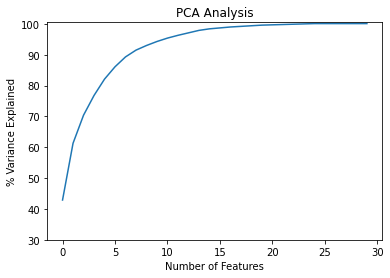

In [126]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 
def generate():

    pca = PCA(30,random_state =0)
    pca.fit(X)
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

    plt.ylabel('% Variance Explained')
    plt.xlabel('Number of Features')
    plt.title('PCA Analysis')
    plt.ylim(30,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)

    return plt.show()
generate()

### Applying PCA with number of principal components = 11

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components=11, random_state = 0)
pca.fit(X)
X = pca.transform(X)
print(X.shape)

(569, 11)


### Split X and y into train and test dataset

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 


In [130]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(426, 11) (143, 11)
(426, 1) (143, 1)


### Fit the rfc model on X_train and y_train also return the time taken by the classifier.
import time

In [131]:
import time
def generate():
    start_time = time.time()
    rfc.fit(X_train,y_train)
    end_time = time.time()
    time2 = end_time-start_time
    return time2
time2 = generate()

C:\Users\Neha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [136]:
print(time2)

68.89872527122498


### Using the model for predictions

In [133]:
predictions = pd.DataFrame()
predictions_pca = rfc.predict(X_test)

### Model evaluation using accuracy score

In [134]:
from sklearn.metrics import accuracy_score

print('Accuracy score for test data is:',accuracy_score(y_test, predictions_pca))


Accuracy score for test data is: 0.9440559440559441


### Find the difference between the time taken by both the models.

In [137]:
def generate():
    return time2/time1
time_difference = generate()
print(time_difference)

0.6052735500929369


### Conclusion:

 Model 2 is roughly around 40% more faster than model 1. Hence we saw that PCA reduces time taken by classifier to fit.